Department of Physics, University of Pisa (AA 2023-2024)

### Multimessenger Physics Laboratory tutorial series



## Exercise 2 - Reading and manipulating FITS files
#### (M. Razzano, Feb 10, 2024)

In this exercise you will have to read and manipulate a file coming from the second catalog of gamma-ray pulsars observed by the Fermi Large Area Telescope. 
For your information, you can find more details (not fundamental for this exercise) at this page:
https://fermi.gsfc.nasa.gov/ssc/data/access/lat/2nd_PSR_catalog/

### Basic Setup
In the cell below you should import the modules that you think you will require...

In [2]:
#import Numpy
import os
import numpy as np

# Import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

#Now, import the FITS module inside Astropy
from astropy.io import fits
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u

### Open and explore  data file

The file, named *2PC_catalog_v04.fits*, is already in the data directory. Define a work, data and results directories, and open the file
Open it and look how many HDUs there are. Select the HDU1 (PULSAR_CATALOG). How many entries are in the header? How many likes contains the table?

In [3]:
# definisco la work directory
work_dir = os.getcwd()
print("I am in dir %s" % work_dir)

# definisco la data directory
main_dir =os.path.dirname(work_dir)
data_dir = os.path.join(main_dir,"data")
print("data dir is %s" % data_dir)

# definisco la results directory 
results_dir = os.path.join(main_dir,"results")
print("results dir is %s" % results_dir)

#define the input file
input_filename = os.path.join(data_dir,"2PC_catalog_v04.fits")

#First, you can open the file and check the information contained in it
fits_file = fits.open(input_filename)

#Look at the number of HDU, in questo caso sono 4. HDU = header data units
fits_file.info()

I am in dir /home/jovyan/homework-01-data-input-output-with-python-chiaramasia01/exercises
data dir is /home/jovyan/homework-01-data-input-output-with-python-chiaramasia01/data
results dir is /home/jovyan/homework-01-data-input-output-with-python-chiaramasia01/results
Filename: /home/jovyan/homework-01-data-input-output-with-python-chiaramasia01/data/2PC_catalog_v04.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   ()      
  1  PULSAR_CATALOG    1 BinTableHDU    402   117R x 88C   [11A, E, E, E, E, E, E, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 3A, I, E, E, I, E, E, E, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, 2A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 2A, 3A, 1A, E, E, E, E, E, E, E, E, E, E, 3A, 1A, 5A]   
  2  SPECTRAL      1 BinTableHDU    194   117R x 38C   [11A, 1A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   


In [4]:
# Voglio selezionare HDU1, pulsar catalog
data, header = fits.getdata(input_filename, ext=1,header=True) # ext=1 mi da' il pulsar catalog

# Numero di entries nell'header
print(f"Header entries = {len(header)}")

# Numero di righe della tabella
print(f"Data entries = {len(data)}")

header

Header entries = 402
Data entries = 117


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  347 / width of table in bytes                        
NAXIS2  =                  117 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   88 / number of fields in each row                   
TTYPE1  = 'PSR_Name'           / Pulsar name                                    
TFORM1  = '11A     '           / data format of field: ASCII Character          
TTYPE2  = 'RAJ2000 '           / Right Ascension (J2000)                        
TFORM2  = 'E       '           / data format of field: 4-byte REAL              
TUNIT2  = 'deg     '        

### Extract information from the catalog

On the HDU of the catalog, what are the column names? How many pulsars with period less than 20 milliseconds (Millisecond pulsars, MSPs) are in the catalog?

In [5]:
# nome delle colonne
fits_file[1].columns

ColDefs(
    name = 'PSR_Name'; format = '11A'
    name = 'RAJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'DEJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'GLON'; format = 'E'; unit = 'deg'; disp = 'F6.2'
    name = 'GLAT'; format = 'E'; unit = 'deg'; disp = 'F6.2'
    name = 'Period'; format = 'E'; unit = 'ms'; disp = 'F6.2'
    name = 'P_Dot'; format = 'E'; unit = 's/s'; disp = 'E10.4'
    name = 'E_Dot'; format = 'D'; unit = 'erg/s'; disp = 'E10.5'
    name = 'F100'; format = 'E'; unit = 'ph/cm**2/s'; disp = 'E10.4'
    name = 'Unc_F100'; format = 'E'; unit = 'ph/cm**2/s'; disp = 'E9.3'
    name = 'G100'; format = 'E'; unit = 'erg/cm**2/s'; disp = 'E10.4'
    name = 'Unc_G100'; format = 'E'; unit = 'erg/cm**2/s'; disp = 'E7.1'
    name = 'TS_DC'; format = 'E'; disp = 'F7.0'
    name = 'TS_Cutoff'; format = 'E'; disp = 'F7.0'
    name = 'TS_bfree'; format = 'E'; disp = 'F7.0'
    name = 'Photon_Index'; format = 'E'; disp = 'F5.3'
    name = 'Unc_Photon_

In [6]:
# con astropy creo un oggetto tabella
pulsar_data = Table(data)


periodo = pulsar_data.columns[5] # seleziono la colonna relativa al periodo, [ms]
millisec = periodo[periodo<10]
print(millisec) 
print(f" Number of milliseconds pulsar = {len(millisec)}") # numero di pulsar con periodo minore di 10 ms

pulsar_data

Period
------
  3.05
  4.87
  1.88
  2.57
  2.96
  2.32
   3.3
  5.76
  3.86
  3.06
   ...
  1.56
  1.61
   2.9
  2.38
  4.29
  4.51
  4.93
  3.12
  2.61
  2.19
  5.19
Length = 40 rows
 Number of milliseconds pulsar = 40


PSR_Name,RAJ2000,DEJ2000,GLON,GLAT,Period,P_Dot,E_Dot,F100,Unc_F100,G100,Unc_G100,TS_DC,TS_Cutoff,TS_bfree,Photon_Index,Unc_Photon_Index,Cutoff,Unc_Cutoff,Distance,Neg_Unc_Distance,Pos_Unc_Distance,UL_Distance,Distance_Method,Distance_Ref,Prop_Motion,Unc_Prop_Motion,Prop_Motion_Ref,P_Dot_Int,Neg_Unc_P_Dot_Int,Pos_Unc_P_Dot_Int,E_Dot_Int,Neg_Unc_E_Dot_Int,Pos_Unc_E_Dot_Int,Luminosity,Unc_Luminosity,Neg_Sys_Luminosity,Pos_Sys_Luminosity,UL_Luminosity,Efficiency,Unc_Efficiency,Neg_Sys_Efficiency,Pos_Sys_Efficiency,UL_Efficiency,S1400,UL_S1400,S1400_Ref,Num_Peaks,Shift_Method,Radio_Lag,Unc_Radio_Lag,Peak_Sep,Unc_Peak_Sep,HWHM_P1_L,Unc_HWHM_P1_L,HWHM_P1_R,Unc_HWHM_P1_R,HWHM_P2_L,Unc_HWHM_P2_L,HWHM_P2_R,Unc_HWHM_P2_R,H_ColDensity,Neg_Unc_H_ColDensity,Pos_Unc_H_ColDensity,UL_H_ColDensity,XFlux_NonTherm,Neg_Unc_XFlux_NonTherm,Pos_Unc_XFlux_NonTherm,UL_XFlux_NonTherm,XFlux_PWN,Neg_Unc_XFlux_PWN,Pos_Unc_XFlux_PWN,X_Qual,Opt_Object,Opt_Band,Opt_Mag,LL_Opt_Mag,Extinction,Neg_Unc_Extinction,Pos_Unc_Extinction,UL_Extinction,Corr_OptFlux,Neg_Unc_Corr_OptFlux,Pos_Unc_Corr_OptFlux,UL_Corr_OptFlux,Type,Binary,History
str11,float32,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str3,int16,float32,float32,int16,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,str2,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str2,str3,str1,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str3,str1,str5
J0007+7303,1.7565,73.0523,119.66,10.46,315.89,3.57e-13,4.48e+35,3.294e-07,4.5e-09,4.006e-10,4.47e-12,43388.0,1884.0,4.0,1.397,0.016,4662.0,174.1,1.4,0.3,0.3,nan,K,6,nan,nan,0,nan,nan,nan,nan,nan,nan,9.394e+34,1.048e+33,3.595e+34,4.457e+34,nan,0.2099,0.002342,0.08031,0.09958,nan,nan,0.005,78,2,,nan,nan,0.216,0.005,0.0526,0.0023,0.082,0.0378,0.0851,0.0464,0.0541,0.0029,nan,nan,nan,5e+21,9.84e-14,7e-16,7e-16,nan,2.14e-12,1.7e-14,1.4e-14,0,U,R,nan,27.6,0.92,0.42,0.49,nan,nan,nan,nan,5.4e-17,YRQ,N,Gamma
J0023+0923,5.8203,9.39,111.38,-52.85,3.05,1.09e-20,1.51e+34,1.178e-08,3.54e-09,8.01e-12,1.23e-12,131.0,16.0,7.0,1.405,0.395,1408.0,601.0,0.69,0.11,0.21,nan,DM,75,nan,nan,0,nan,nan,nan,nan,nan,nan,4.563e+32,7.007e+31,1.339e+32,3.2e+32,nan,0.03021,0.004639,0.008863,0.02118,nan,0.189,nan,75,2,o,0.375,0.0639,0.608,0.192,0.1642,0.0747,0.1284,0.0463,0.1401,0.1238,0.0776,0.1435,3.45e+21,2e+19,2e+19,nan,2.1e-14,1.7e-14,2e-14,nan,nan,nan,nan,2,BC,g,25.0,nan,nan,nan,nan,0.37,8.6e-16,0.0,0.0,nan,MSP,Y,Radio
J0030+0451,7.6143,4.861,113.14,-57.61,4.87,1.02e-20,3.62e+33,6.599e-08,3.32e-09,6.135e-11,1.82e-12,4788.0,316.0,10.0,1.211,0.072,1820.0,170.8,0.28,0.06,0.1,nan,P,87,5.7,1.1,65,1.06e-20,6.724e-23,8.121e-23,3.623e+33,2.298e+31,2.776e+31,5.755e+32,1.707e+31,2.202e+32,4.845e+32,nan,0.1589,0.004713,0.06079,0.1337,nan,0.6,nan,24,2,p,0.16,0.001,0.45,0.001,0.0068,0.001,0.039,0.0035,0.0084,0.0012,0.005,0.0009,nan,nan,nan,1.5e+22,2.55e-13,2.9e-14,2.9e-14,nan,nan,nan,nan,0,U,V,nan,27.0,0.36,0.13,0.19,nan,nan,nan,nan,6.9e-17,MSP,N,Radio
J0034-0534,8.591,-5.5769,111.49,-68.07,1.88,4.98e-21,1.72e+34,2.18e-08,2.91e-09,1.625e-11,1.18e-12,563.0,45.0,0.0,1.436,0.169,1831.0,416.7,0.54,0.1,0.11,nan,DM,8,31.0,9.0,51,2.223e-21,1.445e-21,1.459e-21,1.718e+34,8.585e+33,8.668e+33,5.67e+32,4.117e+31,1.905e+32,2.545e+32,nan,0.03301,0.002397,0.01109,0.01482,nan,0.61,nan,21,2,p,0.866,0.0049,0.285,0.023,0.0329,0.007,0.0059,0.0028,0.0835,0.0509,0.0383,0.0179,nan,nan,nan,1.5e+21,nan,nan,nan,5.8e-15,nan,nan,nan,1,BC,I,24.8,nan,nan,nan,nan,3.13,6.6e-16,0.0,0.0,nan,MSP,Y,Radio
J0101-6422,15.2963,-64.375,301.19,-52.72,2.57,4.8e-21,1.01e+34,7.51e-09,1.4e-09,1.047e-11,9.1e-13,491.0,59.0,1.0,0.693,0.29,1523.0,358.3,0.55,0.08,0.

### Plot the sky distribution

Can you plot the sky distriution in galactic coordinates (GLAT, GLON)? You can use the Aitoff projections to make a fancier plot (See https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/geo_demo.html).
Can you plot with 2 different colors the pulsars with periods greater than 10 milliseconds and the MSPs?


Indici delle righe con periodo minore di 10 ms: [  1   2   3   4   5   8  10  12  14  15  16  25  32  40  42  44  51  55
  57  58  61  64  69  70  73  77  79  86  87  89  94  95 102 104 105 108
 110 111 115 116]


Text(0, 0.5, 'Latitudine galattica')

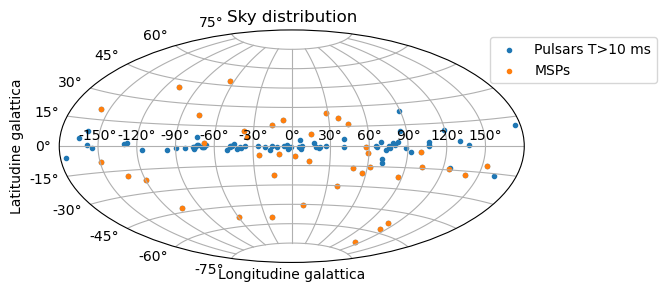

In [15]:
# Trova gli indici delle righe in cui il periodo è minore di 10 ms
millisec_indices = np.where(periodo < 10)[0]

print("Indici delle righe con periodo minore di 10 ms:", millisec_indices)


fig_sky = plt.figure(figsize=(6,6))
plt.subplot(111, projection="aitoff")
plt.title("Sky distribution")
plt.grid(True)

c= SkyCoord(l=pulsar_data["GLON"]*u.deg, b=pulsar_data["GLAT"]*u.deg, frame='galactic') #defining frame and coordinates system

l_rad = c.l.wrap_at(180 * u.deg).radian #converting from degree (0,360) to radians (-pi,pi)
b_rad = c.b.radian

# Trovo latitudine e longitudine delle pulsar corrispondenti a un T<10 ms
millisec_l = l_rad[millisec_indices]
millisec_b = b_rad[millisec_indices]


# Plot
plt.scatter(l_rad, b_rad, marker='.')
plt.scatter(millisec_l, millisec_b, marker='.')
plt.legend(['Pulsars T>10 ms', 'MSPs'], loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlabel("Longitudine galattica")
plt.ylabel("Latitudine galattica")

### Plot some distributions

Of course, can you also plot histograms showing the luminosity distribution (also in log scale, or the period (also in log scale)?

<class 'astropy.table.column.Column'>


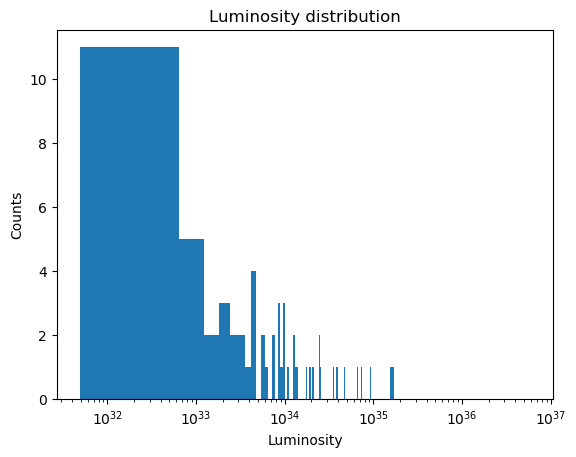

In [19]:
luminosity = pulsar_data['Luminosity']
print(type(luminosity))

# Creare una maschera booleana per identificare i valori non NaN
luminosity_index = ~np.isnan(luminosity)
#print(luminosity_index)
# Selezionare solo i valori validi utilizzando la maschera
luminosity_corr = luminosity[luminosity_index]
#print(luminosity_corr)
fig_lum = plt.figure()
plt.hist(luminosity_corr, bins=10000)
plt.xscale('log')
plt.title('Luminosity distribution')
plt.xlabel('Luminosity')
plt.ylabel('Counts')
plt.show()

### Plot the P-Pdot diagram

Another very interesting plot is the scatter plot (in log scale) of the period (x axis) vs period first derivative (y axis). This P-Pdot diagram gives very useful information about the pulsars distribution, as you will see soon. Can you plot in this diagram, using 2 different colors for the MSPs and "regular" pulsars?

Text(0, 0.5, 'Pdot')

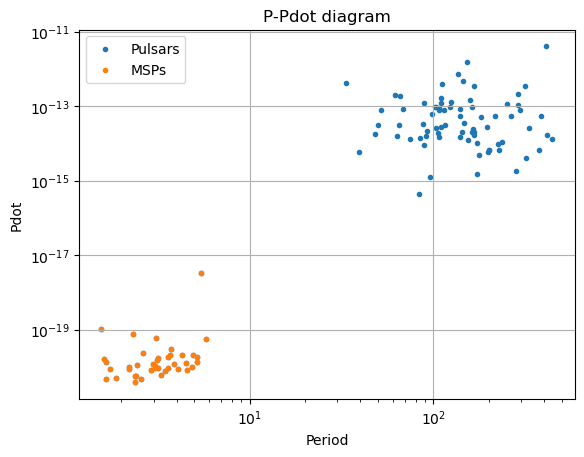

In [20]:
pdot = pulsar_data['P_Dot'] # seleziono la colonna pdot
pdot_millisec = pdot[millisec_indices] # seleziono gli elementi relativi alle MSPs

# Plot
fig_ppdot = plt.figure()
plt.scatter(periodo, pdot, marker='.')
plt.scatter(millisec, pdot_millisec, marker='.')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Pulsars', 'MSPs'])
plt.title("P-Pdot diagram")
plt.grid(True)
plt.xlabel('Period')
plt.ylabel('Pdot')

### Save in an output file
You can use the *plt.savefig* function to save the plots that you have done. Please remember to save in the "results" directory

In [22]:
# salvo nella directory results

fig_sky.savefig(os.path.join(results_dir, 'skydistribution.pdf'), bbox_inches='tight')  
fig_lum.savefig(os.path.join(results_dir, 'luminositydistribution.pdf'), bbox_inches='tight')  
fig_ppdot.savefig(os.path.join(results_dir, 'ppdot.pdf'), bbox_inches='tight')  

### Final steps
Congratulations! Don't forget to save to Github (using git commit + git push)